[Bagging and Random Forest Ensemble Algorithms for Machine Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)

## Bagging

The bagging estimate is defined by 
$$\hat{f}(x)=\frac{1}{B}\sum^{B}_{b=1}\hat{f}^{*b}(x)$$

Bagging seems to work especially well for high-variance, low-bias procedures, such as trees. The essential idea in bagging is to average noisy but aprroximately unbiased models, and hence reduce the variance.

### Bag of little boostrap

## Bootstrap Methods
Suppose we have a model fit to set of training data. We denote the training set by $Z = (z_1, z_2, ..., z_N)$ where $z_i = (x_i, y_i)$. The basic idea is to randomly draw datasets with replacement from the training data, each sample the same size as the orignal training set. This is done $B$ times, producing B bootstrap datasets. Then we refit the model to each of the bootstrap datasets, and examine the behavior of the fits over the B replications.

# Lesson 2
## Random Forest for Regression or Classfication

1. For b = 1 to $B$:  
    (a) Draw a bootstrap sample $Z^*$ size *N* from the training data.  
    (b) Grow a random-forest tree $T_b$ to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimum node size $n_{min}$ is reached.  
        i. Select m variables at random from the p variables.  
        ii. Pick the best variable/split-point among the m.  
        iii. Split the node into two daughter nodes.    
2. Output the ensemble of trees ${T_b}^B_1$.  

To make a prediction at a new point x:  
*Regression*: $\hat{f}^B_{rf}(x) = \frac{1}{B}\sum^{B}_{b=1}T_b(x)$.  
*Classification*: Let $\hat{C}_b(x)$ be the class prediction of the *b*th random forest tree. Then $\hat{C}_{rf}(x) = majority\ vote\ \{\hat{C}_b(x)\}^B_1$

### symlink
A symbolic link, also termed a soft link, is a special kind of file that points to another file, much like a shortcut in Windows or a Macintosh alias. Unlike a hard link, a symbolic link does not contain the data in the target file. It simply points to another entry somewhere in the file system. 
```linux
ln -s source_file myfile
```

```python
ln -s ~/fastai/fastai fastai
```

#### Small trick

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "../data/bulldozers/"

In [4]:
! ls {PATH}

Test.csv  Train.csv  Valid.csv


<font color=blue>It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup.</font>

## In-Class Notes

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals. You should **always** consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't caputure any trend/cyclical behavior as a function of time at any of these granularities.

In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [7]:
display_all(df_raw.tail().transpose())

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [23]:
display_all(df_raw.describe(include='all').transpose())

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Initial processing

In [9]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice) 
# this dataset contains a mix of continuous and categorical variables, which causes the following error

ValueError: could not convert string to float: 'Conventional'

In [10]:
add_datepart(df_raw, 'saledate')

If the categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric doing required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

In [11]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

The categorical variable are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

In [12]:
train_cats(df_raw)
"""
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

.items():
first returns variable names;
second returns values.
"""

"\ndef train_cats(df):\n    for n,c in df.items():\n        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()\n\n.items():\nfirst returns variable names;\nsecond returns values.\n"

In [13]:
df_raw.UsageBand.cat.categories 
# show you a lot information about categical variables  df.[catname].cat.*

Index(['High', 'Low', 'Medium'], dtype='object')

Go through each column and numeicalize it. If it is not numeric, then replace the dataframe field with columns cat codes plus one (dealing missing values)

In [15]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [17]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [20]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [22]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

### Pre-processing

In [23]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [24]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [25]:
nas #what does this mean here?

{'MachineHoursCurrentMeter': 0.0, 'auctioneerID': 2.0}

Run some randomforest

In [26]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df, y)
m.score(df, y) # what is this m.score function? Only for r^2?

0.98306839469785723

* What's $R^2$  
$R^2=1-\frac{SS_{res}}{SS_{tot}}$  
$SS_{tot} = \sum_{i}(y_i-\overline{y})$, $SS_{res} = \sum_{i}(y_i-f_i)^2$  
If we don't use OLS, then the possible value of $R^2$ could be from $-\infty$ to 1

* In general, anytime you're building a model that has a time element you want your test set to be a separate time period and therefore you really need your validation set to be observer time period as well.

In [33]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000 # same as Kaggle's test set size
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)



In [34]:
X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

[PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

### Base model

In [35]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)    

In [37]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train) # gives you the time needed to run for this function
print_score(m)

CPU times: user 59.8 s, sys: 208 ms, total: 60 s
Wall time: 30.7 s
[0.0901586568252938, 0.24899099791258109, 0.98301170898035606, 0.88928275629006681]


### Speeding things up

In [38]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000) # _ throw away something
y_train, _ = split_vals(y_trn, 20000)

In [40]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.54 s, sys: 0 ns, total: 2.54 s
Wall time: 1.37 s
[0.1051008568717912, 0.3356612592154089, 0.97766955660650579, 0.79878960532415277]


### Single tree

In [41]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.4965829795739235, 0.5246832258551856, 0.50149617735615859, 0.50836551980878353]


* Make a small tree. So we pass in max_depth equals three. This creates a small deterministic tree.   
The first step is to creat the first binary decision. How would you pick which vairable and split point?  
* For each value of each variable, compare their weighted average mse? Or ther metric(s).   
* If we don't specify the max_depth, it then will split until every leaf node only has one thing in it, so the training $R^2$ is 1. But the validation score is not as good as we want.

In [ ]:
draw_tree(m.estimators_[0], df_trn, precision=3) # can't run on my pc

In [47]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[8.331852114593072e-17, 0.46745131056713346, 1.0, 0.6097699249549946]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

## Bagging

### bagging (n_estimators)
What if we created five different models, each of which was only somewhat predictive but the models weren't at all correlated with each other. They gave predictions that were correlated with each other. That would mean that five models would have profound different insights into the relationships in the data and so if you tok the average of those five models, then you're effectively bringing the insights from each of them and so this idea of averaging models is a technique for ensembling, which is really important.   
**The entire purpose of modeling in machine learning is to find a model which tells you which variables are important and how they interect together to drive your dependent variable.**  

The research community in recent years has generally found that more important thing seems to create uncorrelated trees rather than more accurate trees so more recent advances tend to create trees which are less predictive on their own but less correlated with each other. For example, in scikit-learn, there is another class you can use called extra trees regress on your extra trees classifier with exactly the same api(?) you can try it. That's called extremely randomized trees model and what that does exactly the same as what we just dicussed but rather than trying every space of every variable it randomly tries a few splits of a few variables. 

<font color=red>**Question**: does tree max_depth = None always includes the best tree max_depth = 3? Like the bestsubset in liear regression, the max_depth = None will pick the best one in all possible models. So the order of variables in the tree does not matter?</font>

In [48]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)

preds = np.stack([t.predict(X_valid) for t in m.estimators_]) # the default is 10 trees?
preds[:, 0], np.mean(preds[:,0]), y_valid[0]

(array([  9.54681,   9.04782,   9.6486 ,   9.39266,   9.6486 ,   9.21034,   8.92266,   9.04782,   9.39266,
         10.04325]), 9.3901218123321026, 9.1049798563183568)

In [52]:
preds.shape

(10, 12000)

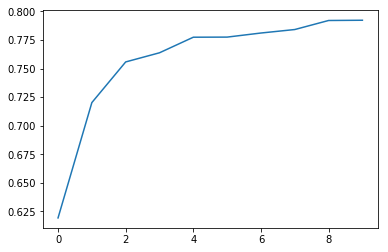

In [53]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

preds.shape will be (10, 12000), which means 12,000 predictions for each of the ten trees.

`m.estimators_` gives us each tree model in the whole models. So here we want to see how predition scores of each tree. Here we just see the first column.

The shape of the this curve (no pic) suggests that adding more trees isn't going to help us much. (like n_estimators=20, n_estimator=30, n_estimator=40, ...)

### Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag error which can handle this.  

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.  

This also has the benifit of allowing us to see whether our model generalizes, even if we only have a samll amount of data so want to avoid separating some out to create a validation set.

In [59]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08949240591601826, 0.3230857467455317, 0.98380961409068046, 0.81358383376743459, 0.88454228391657053]


This shows that our validation set time difference is making an impact, as is model over-fitting.

### Gird-search
there's a scikit-learn function called grid search you pass in the list of all of the parameters all of the hyper parameters that you want to tune you pass in each one of all of the values of that hyper parameter you want to try and it runs your model on every possible combination of all of those hyper parameters and tells you which one is the best. And our B score is a great like choice for ...

## Reducing over-fitting

### Subsampling
It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. The basic idea is this: rather than limit the amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [61]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

now when we run a random forest, it's not going to bootstrap an entire set of all training datasets, it's going to just grab a subset of 20,000 rows. But now every tree can have access to the whole dataset. So if we do enough estimators, enough trees, eventually, it's going to see everything.  '
The trick here is that with a random forest using this technique no dataset is too big. I don't care if it's got a hundred billion rows. You can create a bunch of trees each one of the different random subsets.  

* set_tf_samples is not compatible with oob_score? So we need to trun oob_score = False if we use set_rf_samples() ? But why in the video, it is True?
* to set is back, `reset_rf_samples()`

In [63]:
set_rf_samples(20000)

In [64]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6.93 s, sys: 348 ms, total: 7.28 s
Wall time: 5.06 s
[0.23930104533275026, 0.27847272241805576, 0.88031932841537297, 0.86151163270019038, 0.86789803142919586]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful

In [65]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22653946174515496, 0.261632595227844, 0.89274376332943095, 0.87775484028303985, 0.88128755465193609]


_In practice, when Jeremy's doing interactive machine learning using random forests, in order to explore models, explore hyperparameters stuff, where we actually analyze like feature importance and partial dependence and so forth he generally use subsets and reasonably small forests because all the insights that he's going to get are exactly the same as the big ones but he can run it in like you know three or four secods rather than hours._

### Tree building parameters


We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [66]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [67]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07835232273958477, 0.23659484964487307, 0.98716964782722527, 0.90003256551059774, 0.9084809535209073]


* `min_samples_leaf`
Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we required some minimum number of rows in every leaf node. This has two benefits:  
    * There are less decision rules for each leaf node; simpler models should generalize better  
    * The predictions are made by averaging more rows in the leaf node, resulting in less volatility.

In [68]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11516305194422667, 0.2340796330115372, 0.97228204678790875, 0.90214675555926049, 0.90850831038438051]


`min_samples_leaf`: The minimum number of samples required to be at a leaf node:  
* If int, then consider min_samples_leaf as the minimum number.  
* If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* Jeremy's advice: [1, 3, 5, 10, 25], but if sometimes you have a very large dataset, you might need a minimum samples leaf of hundreds or thousands.

* `max_features`: The number of features to consider when looking for the best split.  

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but also a sample of columns for each split. We do this by specifying `max_features`, which is the porportion of features to randomly select from at each split.

In [69]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11924943803289606, 0.2274472685732933, 0.97028008874510163, 0.90761330620883574, 0.91154220669498009]


**Remark**: There might be some interactions between variables where that interaction is more important than individual column so if every tree always fits on the first thing the same thing the first you're not going to get much variation in those trees so what we do is in addition to just taking a subset of rows we then at every single split point take a different subset of columns so it's slightly different to the row sampling. For the row sampling, each new tree is based on a random set of rows. Columns sampling every individual binary split we choose from a different subset of columns so in other words rather than looking at every possible level of every possible column we look at every possible level of a random subset of columns. `max_features=0.5` means randomly choose half of them. Also you can use "auto", "sqrt", "log2", and etc. 

**When split order categorical variables, without sort, how can we just split them binary?**   
Because tree is like infinitely flexible even with categorical variable if there's a particular category which have different levels of price it can like gradually zoom in on those groups by using multiple splits. You can help it by telling it the order of your categorical variable but even if you don't, it's okay it's just going to take a few more decisions to get there.  

# Lesson 3
**In what situations should I not try random forests and try other things as well?**  
For unstructured data, where are all the different data points represent the same kind of thing, like a wave form in a sound, or speech, or the words, and piece of text, or the pixels in an image, almost certainly you're going to try deep learning and then outside of those two there's a particular type of model we're going to look at called a collaborative filtering model.

In [ ]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozer-raw')

The feather format file is basically almost the same format that it lives in RAM so it's like ridiculously fast to read it and write stuff from feather point.

In [ ]:
df, y, nas = proc_df(df_raw, 'SalePrice', na_dict=nas) # try to run this function, see what the output looks like

bug fixed. There might be some categories in test data not existing in training data. Also to fill the missing values with median or mean, we need to keep training and test dataset consistent.

[Grocery-sales-forecasting](https://www.kaggle.com/c/favorita-grocery-sales-forecasting)  
There are many tables in this dataset

In [ ]:
types = {'id': 'int64',
        'item_nbr': 'int32',
        'store_nbr': 'int8',
        'unit_sales': 'float32',
        'onpromotion': 'object'}

In [ ]:
df_all = pd.read_csv(f'{PATH}train.csv', parse_dates = ['date'], dtype = types, infer_datetime_format = True)

**When we use low memory equals to false?**  
The low_memory option is not properly deprecated, but it should be, since it does not actually do anything differently  .  
The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column.   
Specifying dtypes (should always be done), *like what we did above*

In [ ]:
df_all.describe(include='all') #have a summary statistics
df_test.describe(include='all') #look at the test data

**Remark:** After we look into the data, we find that the date of test data is right after the date of training data. So how should we subset the training data? Randomly? Sure not. We should select from the bottom more recent. We are not completely throwing away the older date data. Later we might want to weight for recent dates more highly.

In [ ]:
df_all.unit_sales = np.log1p(np.clip(df_all.unit_sales, 0, None)) # log the dependent variable

* `numpy.clip()`  
Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

In [ ]:
# train_cats(raw_train)
# apply_cats(raw_valid, raw_train)

I think this is a good way to see whether your model gets improved, instead of submitting a csv file to kaggle.

In [ ]:
def rmse(x,y):return math.sqrt((x-y)**2).mean()

def print_score(m):
    res = [rmse(m.predict(x), y), rmse(m.predict(val), y_val),
                m.score(x, y), m.score(val, y_val)] # what is .score?
    if hasattr(m, 'obb_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
set_rf_samples(1_000_000)

* The runing time depends on n_estimators * set_rf_samples

In [ ]:
x = np.array(trn, dtype=np.float32)
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=100, n_jobs=8) 
# he used 60 cores? If you use every core, it might be slower? So use 8 instead.
%time m.fit(x, y)
# when we use model.fit function ,it actually convert the X into a array. So instead of converting multiple times
# when run different models, he just converted it to a array x first.

In [ ]:
%prun m.fit(x,y)
# prun, run something called a profile and what a profiler does is it'll tell you which lines of code behind
# the screens took the most time right and in this case I noticed that there was a code... 

**Remarks:** we can't use oob_score here when we set the set_rf_samples. Because if we do, it's going to use the other 124 million rows to calculate the oob score.

Then try other parameters

In [ ]:
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, n_jobs=8) 
%time m.fit(x, y)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, n_jobs=8) 
%time m.fit(x, y)
%time print_score(m)

**Remark:** the results look reasonable becuase the errors decrease somehow. When we say reasonable though it's not reasonble in the in the sense that it does not give a good result on the way to one (?). Why? When does random forest not work well?   
For example, if we look at the grocery data, the columns that we have to predict with are the date, the store number, the item number and whether on promotion or not, also day of month, day of year and etc. So if you think about it, most of the insight you know around like how much of something you expect to sell tomorrow it's likely to be very wrapped up in the details about like where is that store what kind of things do they tend to sell at that store for that item, what category of item. The random forest has no ability to create anything other than create a bunch of binary splits on things like they have store number item. it doesn't know which which one represents gasoline, it doesn't know which stores are in the center of city versus which ones are out of it. Its ability to know what's really going in is somewhat limited so we're probably going to need to used the entire four years of data to even get some useful insights. But then the students beside using the whole four years of and one of the data we're using is really old so interestingly, there's a kaggle kernel that points out that what you could do is just take the last two weeks and take the average sales by date by store number by item number and just submit that  and if you just submit that you come about 30th.

<font color=blue> It's actually very often to use supplement data, like external data (weather, festivals), as long as you post on the forum that you're using it and then it's publicly avaiable. Outside of Kaggle, you should always be looking like what external data could I possible leverage here.</font>

 If you don't have a good validation set it's hard, if not impossible, to create a good model. So in other words if like if you're trying to predict next month's sales and you build a bunch of models and you have no idea of knowing whether the models you've built are good at predicting sales a month ahead of time then you have no way of knowing when you put your model in production whether it's actually going to be good. So you need a validation set that you know it is reliable and telling you whether or not your model is likely to work well when you put it into production.

## Condfidence based on tree variance

**Remark:** Since we already know how to get the predictions, which is we take the average value in each leaf node in each tree after runing a particular row thorough each tree that's how we get them the prediction but normally we don't just want a prediction we also want to know how confident we are of that prediction. So we would be less confident for a prediction if we haven't seen many examples of rows. Then we wouldn't expect any of the trees kind of have a path through which is designed to help us predict that row. And so conceptually you would expect that as you pass this unusual row through different trees it's not going to end up in very different places. So in other words, rather than just taking the mean of the predictions of the trees and saying that's a prediction, what if we took the standard deviation of the predictions of the trees. If the standard deviation is high, that means each tree is giving us a very different estimate of this row prediction. So if this was a really common kind of row, then the trees follow forward to make good predictions for it because it seem a lot of opportunities to split based on those kinds of row. So the standard deviation of the predictions across the trees gives us some kind of, at least, relative understanding of how confident we are of this prediction.

**Example:**

In [70]:
set_rf_samples(50000)

In [71]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True) #? True
m.fit(X_train, y_train)
print_score(m)

[0.20604303336716037, 0.24951637431328857, 0.91127404226079034, 0.88881503178922605, 0.89422216731984672]


We saw how the model averages predictions across the trees to get an estimate - but how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the relative confidence of predictions - that is, for rows where the trees give very different results, you would want to be more cautious of using those results, compared to cases where they are more consistent. Using the same example as in the last lesson when we looked at bagging:

In [73]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.41 s


(9.3133014874362896, 0.25858640908387581)

When we use python to loop through trees like this, we're calculating each in series, which is slow. We can use parallel processing to speed things up:

In [74]:
preds.shape

(40, 12000)

In [76]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 68 ms, sys: 136 ms, total: 204 ms
Wall time: 1.07 s


(9.3133014874362896, 0.25858640908387581)

We can see that different trees are giving different estimates this auction. In order to see how prediction confidence varies, we can add this into our dataset.

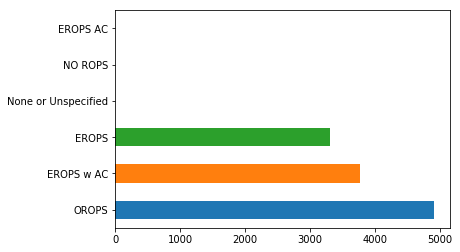

In [77]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [79]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.839814,0.275192
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.580861,0.260647
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.685668,0.222391


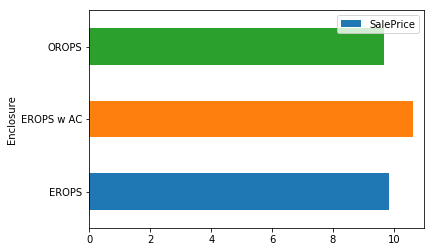

In [80]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

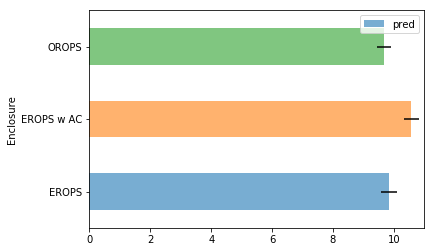

In [81]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 11));

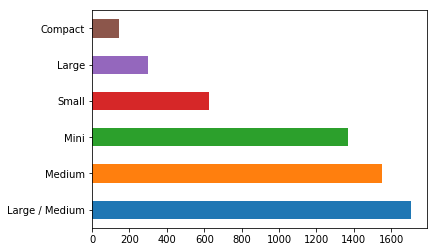

In [82]:
raw_valid.ProductSize.value_counts().plot.barh();

In [83]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.861147,0.344932
Large,10.470589,10.383323,0.365174
Large / Medium,10.691871,10.654666,0.291604
Medium,10.681511,10.614591,0.288217
Mini,9.535147,9.563906,0.243392
Small,10.324448,10.320179,0.311579


In [84]:
(summ.pred_std/summ.pred).sort_values(ascending=False) # the larger, the predictions are less accurate

ProductSize
Large             0.035169
Compact           0.034979
Small             0.030191
Large / Medium    0.027369
Medium            0.027153
Mini              0.025449
dtype: float64

## Feature importance

It's not normally enough to just to know that a model can make accurate predictions - we also want to know *how* it's making predictions. The most important way to see this is with *feature importance*

**Remark:** Confidence interval is the easiest one to understand intuitively, in fact, it's almost identical to something we've already happend. In practice, Jeremy always builds a random forest as fast as he can, and then he plots the feature importance. It tells us in the random forest which columns matter. 

In [89]:
fi = rf_feat_importance(m, df_trn); fi[:10] #fast ai package

,cols,imp
5,YearMade,0.173647
13,ProductSize,0.101731
37,Coupler_System,0.094307
14,fiProductClassDesc,0.081747
2,ModelID,0.055426
63,saleElapsed,0.049711
39,Hydraulics_Flow,0.047575
19,Enclosure,0.046633
38,Grouser_Tracks,0.043145
10,fiSecondaryDesc,0.042892


We could also make some plots here. Then we'll try throw some data away and see if that matters. It might make it a little better if you think about how we build these trees when it's deciding what to split on, it's got less things to have worry about trying, it's less often going to accidentally find a crappy column, but it's not going to change it by much. But it's going to make it faster to let us focus on what matters. The key things happend is that when you remove redundant columns is that you're also removing sources of collinearity. In other words, two columns that might be related to each other. Now, collinearity doesn't make your random forests less predictive, but if you have two columns related to each other, what's gonna happen is that the importance is going to end up like kind of split between the two collinear columns. So both of those columns matter. By removing some of those columns with little impact, it makes your feature importance block clearer.

A technique for working with features:

* To explore how some variable/feature is affecting our model, add a new column with shuffled rows of that column of interest while keeping same random forest model and do predictions to find out how the results change. (Question: Why not remove that column, rather than adding a new column with shuffled rows?. Answer: Then we will have to remodel our random forest again. With suggested approach, we can just do predictions using same model without retraining it) If you want to see interaction effects, which pairs of variables are most important, you could do exactly the same thing each pair in turn. In practice, there're better ways to do that. Because that's obviously computationally pretty expensive.

<font color=red>Question: what's the difference between this technique and just using feature importance? Is shuffling the mechanism under the rf_feat_importance? True </font>

In [90]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

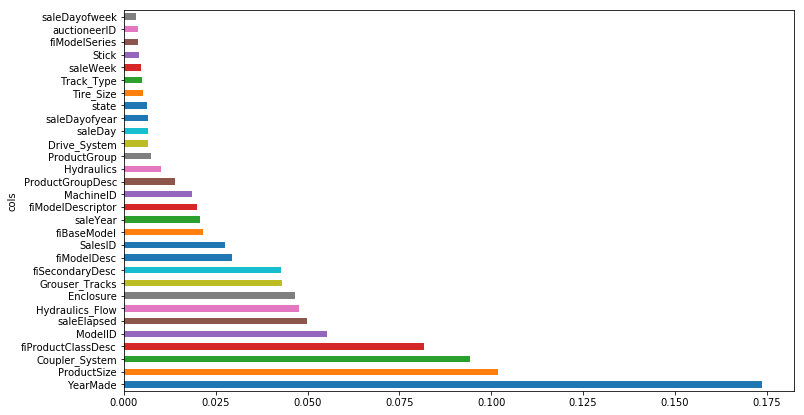

In [91]:
plot_fi(fi[:30]);

In [92]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

In [111]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [94]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20729997372959708, 0.24492230294033987, 0.91018821661946159, 0.89287159406838856, 0.89378532068488914]


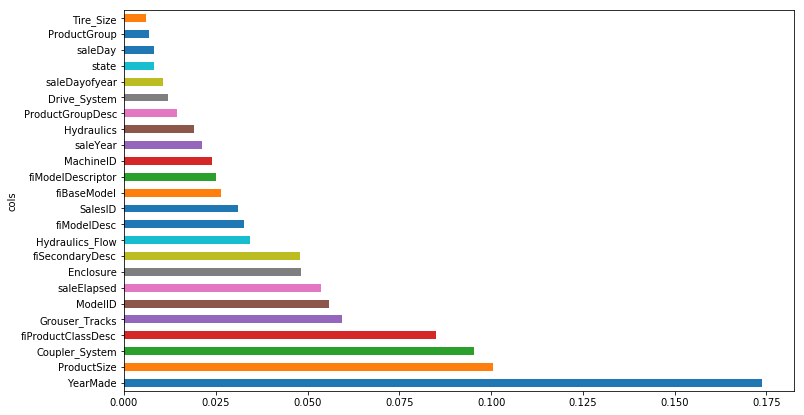

In [95]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi)

# Lesson 4  
**Remark**:  
1. **Summary of relationship between the hyper parameters on random forest and its effects on overfitting and dealing with collinearity and etc.**  
    * First of interest: set the RF samples command which determines how many rows are in each sample in each tree. Before we start a new tree we either bootstrap a sample so sampling with raplacement from the whole thing or we pull out a subsample of a samller number of rows and then we build a tree from there.  By decreasing the set_rf_samples number, we are actually decreasing the power of the estimator and increasing the correlation (?why).  
    
    * `min_samples_leaf`: e.g. Get a whole dataset, then split it into a small sample (overfit less but also less accurate) and build a tree.   e.g 1m --> 20k  So the depth of the tree would be $\log_2(20,000)$. The nodes would be 20k. If we have set min_samples_leaf as 2, then we would get $log_2(20,000)$ -1 layers and 10,000 nodes. The larger the value, the shorter the runnning time, and more general the results would be. Typically, we can 1,3,5,25,100.
    
    * `max_features`: at each point with an each split, we pick a fraction of columns. The reason to do that is we want to the trees to be as rich as possible  
![1](https://plot.ly/~Diksha_Gabha/3013/oob-error-rate-vs-n-estimators.png)  

    * How about each time just select one column and use random forest to see the importance of the feature: Loss of interactions between features.   
    
    * There are two reasons that your validation score might not be very good: 1) you're overfitting. And your oob will also get worse. 2) If your oob score is not getting worse, but your validation score's got worse, that means you're doing something that's true in the training set but not true in the validation set. So this can only happens when your validation set is not randomly sampled

## One-hot encoding

Instread of having 
```python
['Very High', 'High', 'Unknown', 'Low', 'Very Low']
```
since this would waste tree computations as it may first split `['Very High', 'High', 'Unknown']`, and then split this into `['Very High', 'High']` and `['Unkown']`, what we do is recoding each one as a variable with 0,1. So we have 5 columns. Now the RF has the ability to pick one of these and say let's have a look at this `['Unknown']`, there's one possible fit I can do which is 1 versus 0. It actually has the ability in a single step to pull out a single category level. This kind of coding is called one-hot encoding.  

In [96]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat = 7)
# anything with less than seven levels will be turned into one hot encode. 
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20686070815817928, 0.2530193434981967, 0.91056843303104995, 0.88567125845688788, 0.89285723260128746]


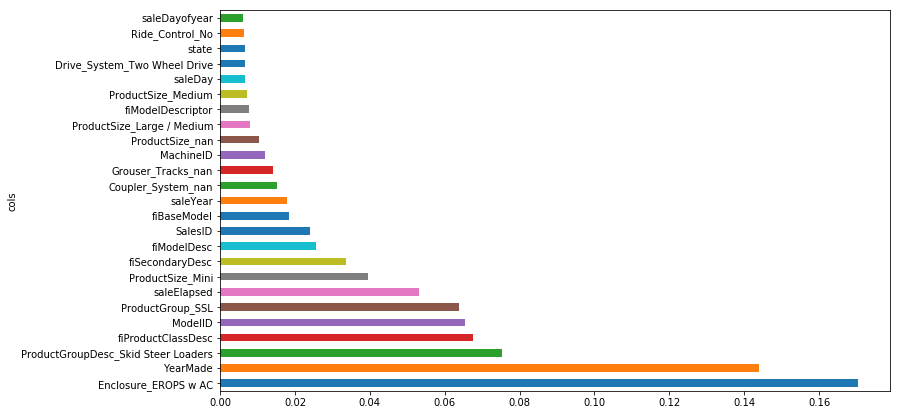

In [97]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

This technique might not improve your model fit, but it could help us understand feature importance better.

## Removing redundant features

Dendrogram is a kind of hierarchical clustering.  
Cluster analysis is something where you're tring to look at objects, they can be either rows in the dataset or columns and find which ones are more similar to each other. So often you'll see people particularly talking about cluster analysis.  
Instead of looking at points, we can look at variables. (rank correlation mentioned)

In [98]:
from scipy.cluster import hierarchy as hc

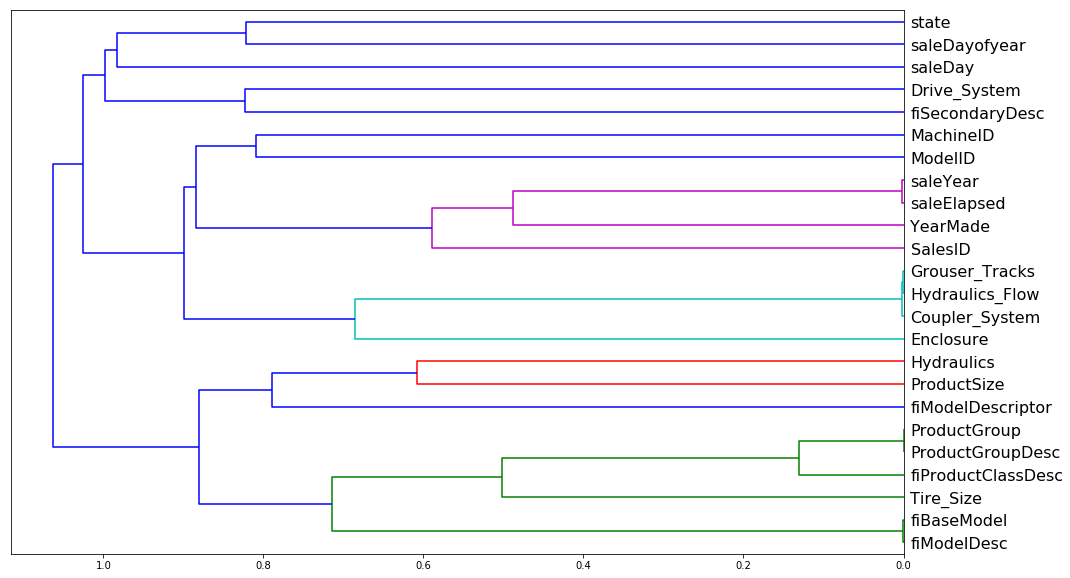

In [99]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [102]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [103]:
get_oob(df_keep) #baseline

0.89023619519627939

In [104]:
# Now we try removing each variable one at a time.
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.889062148308
saleElapsed 0.886913433341
fiModelDesc 0.888752027823
fiBaseModel 0.889144961821
Grouser_Tracks 0.890086206809
Coupler_System 0.889794350692


From the results, it look like we can try one from each group for removal. Let's see what that does. Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

In [105]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.88865537914867876

Looking good! Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

Then later we can see how this model looks on the full dataset. 

In [112]:
df_keep.columns

Index(['YearMade', 'ProductSize', 'Coupler_System', 'fiProductClassDesc',
       'ModelID', 'saleElapsed', 'Hydraulics_Flow', 'Enclosure',
       'Grouser_Tracks', 'fiSecondaryDesc', 'fiModelDesc', 'SalesID',
       'fiBaseModel', 'saleYear', 'fiModelDescriptor', 'MachineID',
       'ProductGroupDesc', 'Hydraulics', 'ProductGroup', 'Drive_System',
       'saleDay', 'saleDayofyear', 'state', 'Tire_Size'],
      dtype='object')

In [113]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [114]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns)) #!

In [115]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

Apply the model to the full dataset

In [116]:
reset_rf_samples()

In [117]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1257768048660441, 0.2269233821774144, 0.9669374807522304, 0.90803841037977573, 0.90866132187226512]


At this point, we can get a model which is smaller, simpler and a good score for.

## Partial dependence  
This is a very powerful technique and many Kaggle people even don't know about it.  
We're going to find out for the features that are important, how do they realte to the dependent variable.  
This next analysis will be a little easier if we use the 1-hot encoded categorical variables, so let's load them up.

In [119]:
from pdpbox import pdp
from plotnine import *

In [120]:
set_rf_samples(50000)

In [122]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

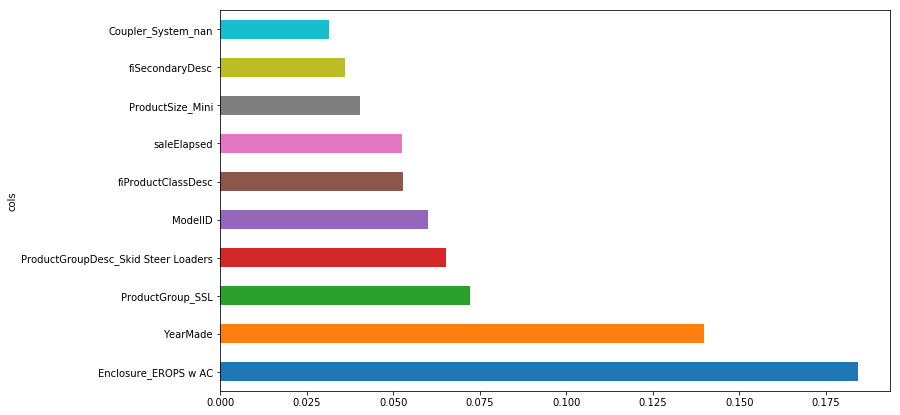

In [123]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]); # from this plot we can see the top 10 important features

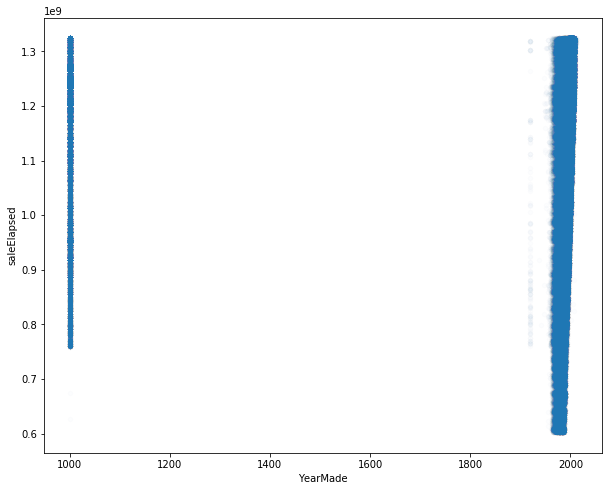

In [124]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8)); 
#  It seems to make sense that both important but it seems very likely they 
# kind of combine together to find how old was the product when it was sold.

In [125]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)  #get sample
# there're a lot 1000 year made made vehicles. So they must be missing or something else.
# exclude them.

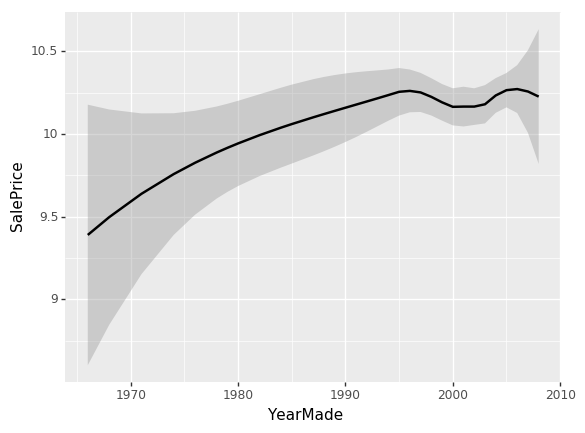

<ggplot: (-9223363283252052627)>

In [127]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

When you're plotting things, there's no point putting something with a hundred million samples when if you're only used a hundred thousand samples it's going to be pixel identical . That's why we call get sample first. the problem of this plot is when you look at a univariate relationship like this, there's a whole lot of collinearity going on, a whole lot of intereactions that are being lost. For example, why did the price drop in a certain year, it actually because things made between 1991 and 1997 are less valuable or is actually because most of them were sold during that time and actually there was maybe a recession then, or maybe products sold during that time a lot more people buying types of vehicles that were less expensive. There's all kinds of reansons for that.  

So what we really want to be able to do is what's the relationship between sale price and year made when all other things are equal. To do that, we do something called a partial dependence plot.

In [128]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [129]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

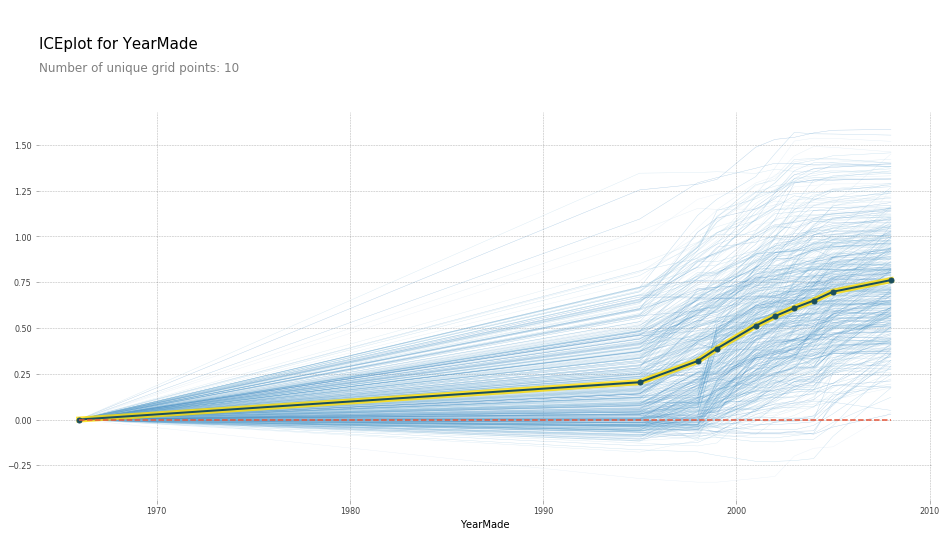

In [130]:
plot_pdp('YearMade')

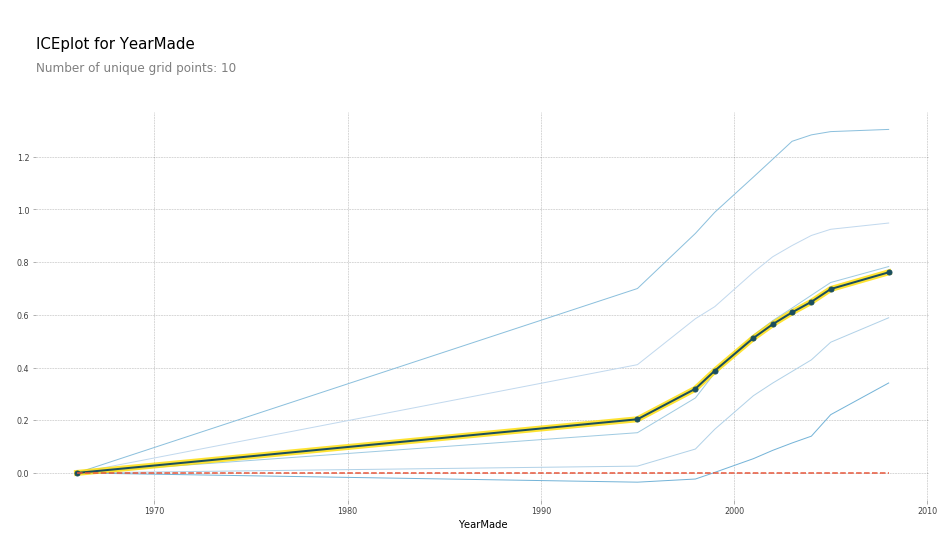

In [131]:
plot_pdp('YearMade', clusters=5)

What's it doing here is it replace the column with a constant value and tells us how much we would have sold that product for in that auction on that day in that place if that product had been made in 1961. Basically, it takes the average of all of the sale prices that we calculate from that random forest. And each of these light blue lines actually is showing us all 500 lines. The yellow line is the average. This partial depencency plot is something which is using a random forest to get us a more clear interpretation of what's going on in our data. So the first step is to look at the feature importance to tell us which things do we think we care about, and then use partial dependence plot to tell us what's going on on average.    

You can also do the same thing in a PDP interaction plot. A pdp interaction plot, for example, here is how to saleElapsed and YearMade together impact price.

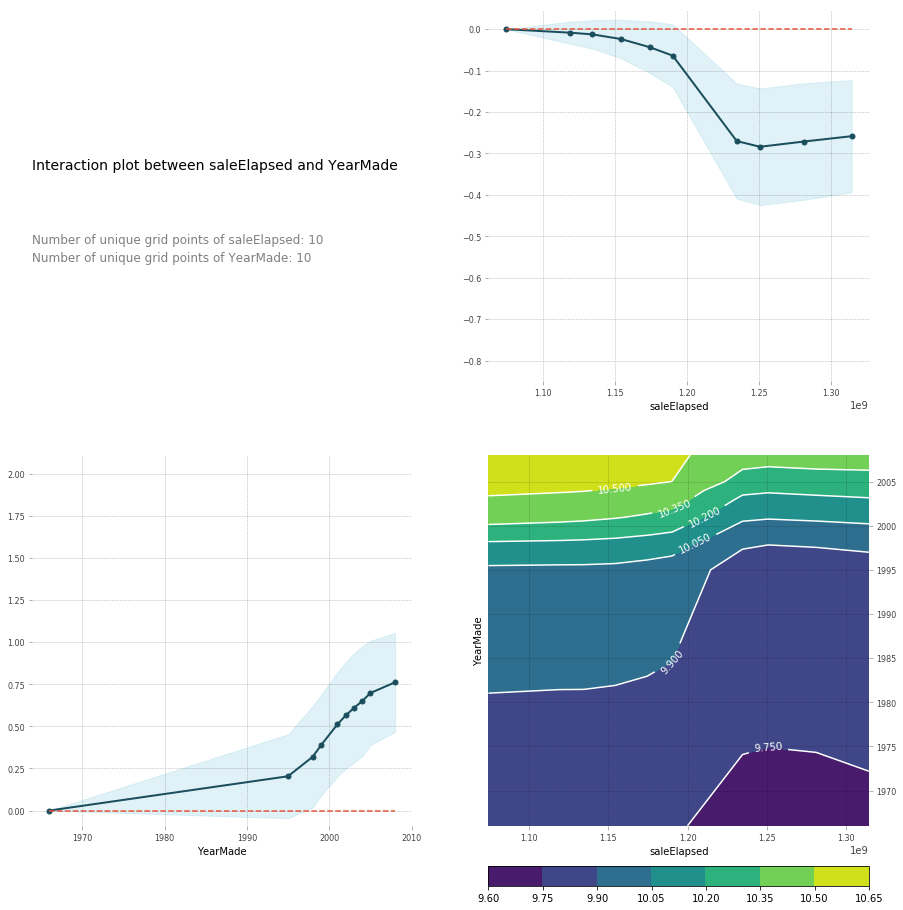

In [132]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

In [133]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

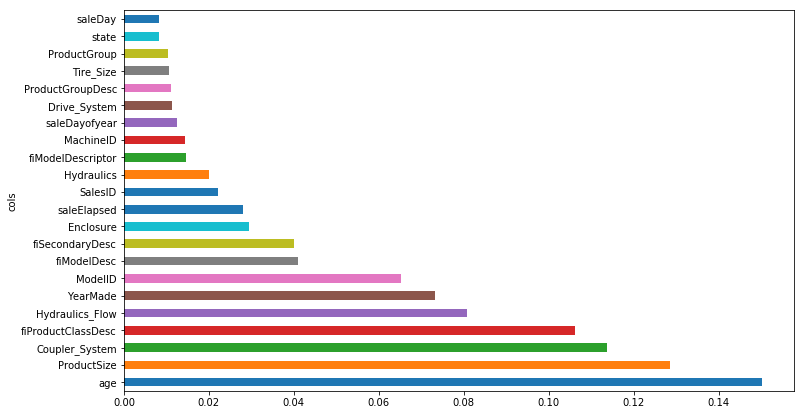

In [134]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

## Tree interpreter 
what tree interpreter does is it allows us to take a particular row, and see how a specific category of a feature impact its score. (Waterfall plots)  

In [137]:
from treeinterpreter import treeinterpreter as ti

In [138]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [139]:
row = X_valid.values[None,0]; row #X_valid.values[0,:]

array([[      1999,          5,          0,         17,        665, 1284595200,          0,          1,
                 0,       3232,    4364751,          0,    2300944,          4,         12,          4,
                 0,         16,        259,         35,          0,         11]])

In [145]:
prediction, bias, contributions = ti.predict(m, row)

In [147]:
prediction[0], bias[0], contributions[0]

(9.2982249344562646,
 10.104901353761727,
 array([ 0.09096, -0.59985,  0.05541, -0.17084,  0.08271, -0.02092,  0.03953, -0.0229 , -0.04693, -0.05877,
        -0.00928, -0.01056,  0.00213,  0.00547,  0.01892,  0.00958,  0.00805, -0.00676, -0.00291, -0.00509,
        -0.01488, -0.14976]))

In [151]:
idxs = np.argsort(contributions[0])
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.59984738161824103),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.17083653172986737),
 ('age', 11, -0.14975665103064237),
 ('fiModelDesc', 'KX1212', -0.058769304859395667),
 ('fiSecondaryDesc', nan, -0.046933040587027498),
 ('Enclosure', 'EROPS', -0.022903879645678193),
 ('saleElapsed', 1284595200, -0.02092355302106319),
 ('Tire_Size', nan, -0.014878028865068772),
 ('fiModelDescriptor', nan, -0.010563258803370034),
 ('SalesID', 4364751, -0.0092798882354930608),
 ('saleDay', 16, -0.0067581951733464152),
 ('state', 'Ohio', -0.0050869925131145962),
 ('saleDayofyear', 259, -0.0029084614201398294),
 ('MachineID', 2300944, 0.0021343172216136352),
 ('ProductGroupDesc', 'Track Excavators', 0.0054669883654703709),
 ('Drive_System', nan, 0.008049383068470339),
 ('ProductGroup', 'TEX', 0.0095832179156904122),
 ('Hydraulics', 'Standard', 0.018922337644501443),
 ('Hydraulics_Flow', nan, 0.039530766635326398),
 ('Coupler_System', na

In [155]:
contributions[0].sum()

-0.80667641930546252

# Lesson 5
**RemarK:**
1. Imagine a dataset with a column of dependent variable. We care about generalization of error in ML. Pull out a random sample as a test set, and the rest of them would be the training set. But we may accidently find a good model for training set and test set. So we need to split out a validation set and test data. So we train our model, and test against validation set, and if we get high prediction accuracy on both validation set and test set, then we would not worry about this.  
2. OOB score. Everytime we calculate error for each tree on rows not included.  Why oob score is on average less good than the validation score? With validation set, we can use the whole forest to make predictions but here we cannot use the whole forest so we cannot exactly see the whole ... only subset of it. (I think because the oob training set is changed?)  
3. Why might I not be able to use a random sample for my validation set? By using a random validation set we could get totally the wrong idea about our model. The important thing to remember is when you build a model you always have a systematic error which is that you're going to use that model at a later time than the time you build it. There is some lag between the data you used to build the model and the data that's going to actually be used on your life. The world changes. If you use a random sample for your validation set, then you're actually checking how good are you at predicting things that are totally obsolete now , that how good are you at predicting things that happend four years ago. So anytime there is some temporal piece, we order them by time, and then use the last piece of it as validation set (and test set).   
4. Cross validation. Most of time you probably shouldn't be using it. Benifit: you could use all of the data and you don't need to put anything aside. Downside: 1) if we have a larget dataset, it would take too long. 2) The random validation is not appropriate for the problem (see 3., temopal issue).  
5. Here is the problem with random forests when it comes to extrapolation. When you got a data set like four years of sales data and you create your tree. When you predict what is going to be the price next month based on the old data you have, there is no way for a tree to be able so say next month would be higher still. One simple way to solve this is to try to aviod using time variables as predicors if there's something else we could use that gives us a better prediction power. What's the difference between our validation set and our training set, ie. which predictors have a strong temporal component and therefore they maybe relevant by the time I get to the future time period.  
    * ** How is my validation set different to my training set? **   
    *Test set, is it a random set or different in some way? [IN this example, looking at the time dependence]*   
    see extrapolation


## Extrapolation
 * The dependent variable is whether is the data in validation set  
 If you can predict it then you don't have a random sample, which means you have to come and figure out how to create a validation set from it.

In [157]:
df_ext = df_keep.copy()
df_ext['is_valid'] =1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [159]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1,  oob_score=True)
m.fit(x, y);
m.oob_score_ # it is very high

0.99997507011530073

In [160]:
fi = rf_feat_importance(m, x); fi[:10] # fidn the most important features

,cols,imp
10,SalesID,0.864008
5,saleElapsed,0.097845
12,MachineID,0.030849
0,YearMade,0.001955
4,ModelID,0.001304
18,saleDayofyear,0.001044
9,fiModelDesc,0.001009
14,Hydraulics,0.000837
2,Coupler_System,0.000334
17,saleDay,0.000273


In [161]:
feats=['SalesID', 'saleElapsed', 'MachineID']
x.drop(feats, axis=1, inplace=True)

In [162]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_ # still very high

0.97870987846681212

In [163]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
18,age,0.226939
0,YearMade,0.197686
15,saleDayofyear,0.156214
4,ModelID,0.079176
8,fiModelDesc,0.061108
14,saleDay,0.057909
16,state,0.053198
3,fiProductClassDesc,0.034922
7,fiSecondaryDesc,0.023868
6,Enclosure,0.021038


In [164]:
set_rf_samples(50000)

In [165]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [166]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) # finally we didn't drop all of them. Maybe check the original markdown file.

[0.20759849251233436, 0.24650376402061, 0.90992936653114143, 0.8914836733089625, 0.89334756275250071]


In [167]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20895185565985708, 0.24618051466393623, 0.90875117289061191, 0.89176808952071007, 0.8926165631345353]
saleElapsed
[0.21469649037101726, 0.2559755603034016, 0.90366486367095522, 0.88298407269594559, 0.88646837171388415]
MachineID
[0.20717866976099808, 0.2469386303162861, 0.91029329466676101, 0.89110046035414459, 0.89452718793056463]
age
[0.20941042844253818, 0.2479369722479431, 0.90835021789733272, 0.89021814602993121, 0.89182411724080224]
YearMade
[0.20907586649431598, 0.2518423409416546, 0.90864283021926018, 0.88673245980276771, 0.89216913579832924]
saleDayofyear
[0.20903731879893628, 0.2444092119720374, 0.90867651448677378, 0.89331997334399005, 0.89264778487776542]


In [168]:
reset_rf_samples()

In [169]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1) #why only drops these three?
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13850309422088536, 0.21815540595501748, 0.95990836408187552, 0.91500763134227547, 0.90920924518260793]


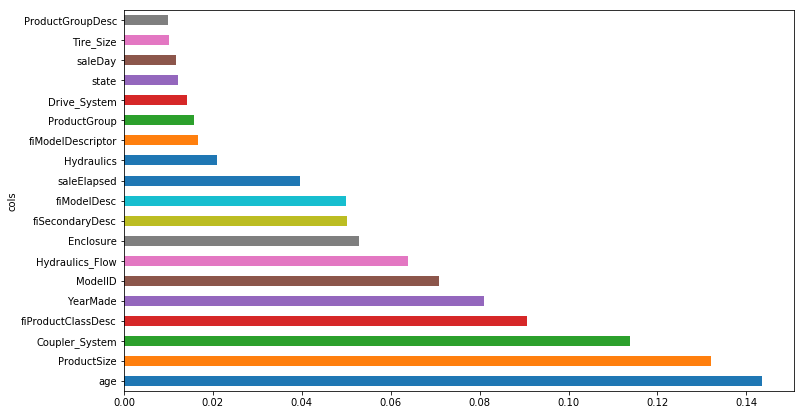

In [170]:
plot_fi(rf_feat_importance(m, X_train));

In [171]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

## Final model!

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# Lecture 7

Remarks:
1. avg: np, var: np(1-p), s.e.: mean/(sqrt(n))  
2. Don't use linear model to interprete  
3. Bootstrap